{% data8page Correlation %}

In [1]:
# HIDDEN
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from scipy import stats

In [2]:
# HIDDEN
def r_scatter(r):
    plt.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plt.scatter(x, y)
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)

## Correlation ##

In this section we will develop a measure of how tightly clustered
a scatter diagram is about a straight line. Formally, this is called
measuring *linear association*.

The table `hybrid` contains data on hybrid passenger cars sold in the
United States from 1997 to 2013. The data were adapted from the online
data archive of [Prof. Larry Winner](http://www.stat.ufl.edu/%7Ewinner/)
of the University of Florida. The columns:

- `vehicle`: model of the car
- `year`: year of manufacture
- `msrp`: manufacturer's suggested retail price in 2013 dollars
- `acceleration`: acceleration rate in km per hour per second
- `mpg`: fuel economy in miles per gallon
- `class`: the model's class.

You can download the file via [hybrid.csv]({{ site.baseurl
}}/data/hybrid.csv).

In [3]:
hybrid = pd.read_csv('hybrid.csv')
hybrid.head()

,vehicle,year,msrp,acceleration,mpg,class
0,Prius (1st Gen),1997,24509.74,7.46,41.26,Compact
1,Tino,2000,35354.97,8.20,54.10,Compact
2,Prius (2nd Gen),2000,26832.25,7.97,45.23,Compact
3,Insight,2000,18936.41,9.52,53.00,Two Seater
4,Civic (1st Gen),2001,25833.38,7.04,47.04,Compact


The graph below is a scatter plot of `msrp` *versus* `acceleration`.
That means `msrp` is plotted on the vertical axis and `accelaration` on
the horizontal.

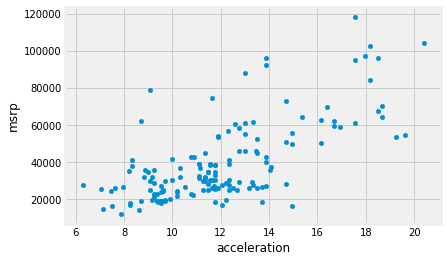

In [4]:
hybrid.plot.scatter('acceleration', 'msrp')

Notice the positive association. The scatter of points is sloping
upwards, indicating that cars with greater acceleration tended to cost
more, on average; conversely, the cars that cost more tended to have
greater acceleration on average. 

The scatter diagram of MSRP versus miles per gallon shows a negative
association. Hybrid cars with higher miles per gallon tended to cost
less, on average. This seems surprising till you consider that cars that
accelerate fast tend to be less fuel efficient and have lower miles per
gallon. As the previous scatter plot showed, those were also the cars
that tended to cost more.

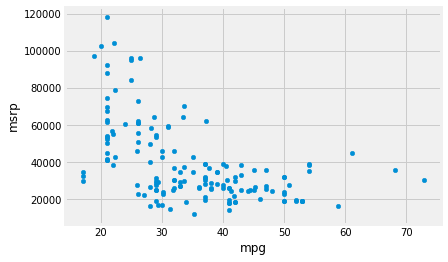

In [5]:
hybrid.plot.scatter('mpg', 'msrp')

Along with the negative association, the scatter diagram of price versus
efficiency shows a non-linear relation between the two variables. The
points appear to be clustered around a curve, not around a straight
line.

If we restrict the data just to the SUV class, however, the association
between price and efficiency is still negative but the relation appears
to be more linear. The relation between the price and acceleration of
SUVs also shows a linear trend, but with a positive slope.

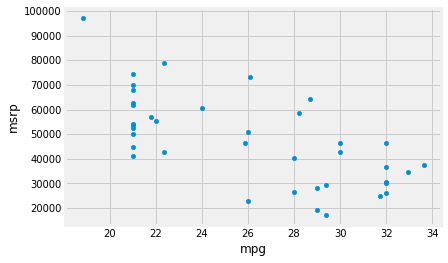

In [6]:
suv = hybrid[hybrid['class'] == 'SUV']
suv.plot.scatter('mpg', 'msrp')

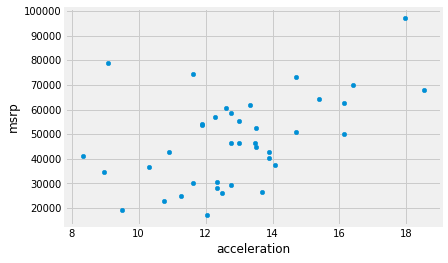

In [7]:
suv.plot.scatter('acceleration', 'msrp')

You will have noticed that we can derive useful information from the
general orientation and shape of a scatter diagram even without paying
attention to the units in which the variables were measured.

Indeed, we could plot all the variables in standard units and the plot
would look the same. This gives us a way to compare the degree of
linearity in two scatter diagrams.

Recall that in an earlier section we defined the function
`standard_units` to convert an array of numbers to standard units.

In [8]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.mean(x))/np.std(x)

We can use this function to re-draw the two scatter diagrams for SUVs,
with all the variables measured in standard units.

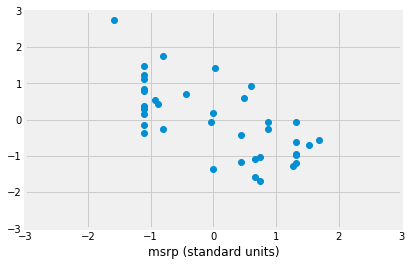

In [9]:
suv_mpg_su = standard_units(suv['mpg'])
suv_msrp_su = standard_units(suv['msrp'])
plt.plot(suv_mpg_su, suv_msrp_su, 'o')
plt.xlabel('mpg (standard units)')
plt.xlabel('msrp (standard units)')
plt.xlim(-3, 3)
plt.ylim(-3, 3);

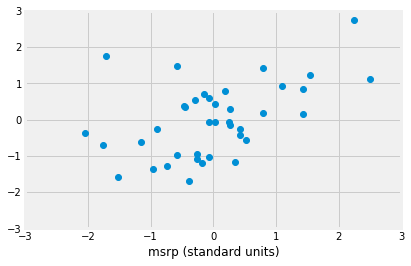

In [10]:
plt.plot(standard_units(suv['acceleration']),
         standard_units(suv['msrp']), 'o')
plt.xlabel('acceleration (standard units)')
plt.xlabel('msrp (standard units)')
plt.xlim(-3, 3)
plt.ylim(-3, 3);

The associations that we see in these figures are the same as those we
saw before. Also, because the two scatter diagrams are now drawn on
exactly the same scale, we can see that the linear relation in the
second diagram is a little more fuzzy than in the first.

We will now define a measure that uses standard units to quantify the
kinds of association that we have seen.


## The correlation coefficient ##

The *correlation coefficient* measures the strength of the linear
relationship between two variables. Graphically, it measures how
clustered the scatter diagram is around a straight line.

The term *correlation coefficient* isn't easy to say, so it is usually
shortened to *correlation* and denoted by $r$.

Here are some mathematical facts about $r$ that we will just observe by
simulation.

- The correlation coefficient $r$ is a number between $-1$ and 1.
- $r$ measures the extent to which the scatter plot clusters around
  a straight line.
- $r = 1$ if the scatter diagram is a perfect straight line sloping
  upwards, and $r = -1$ if the scatter diagram is a perfect straight
  line sloping downwards.

The function ``r_scatter`` takes a value of $r$ as its argument and
simulates a scatter plot with a correlation very close to $r$. Because
of randomness in the simulation, the correlation is not expected to be
exactly equal to $r$.

Call ``r_scatter`` a few times, with different values of $r$ as the
argument, and see how the scatter plot changes. 

When $r=1$ the scatter plot is perfectly linear and slopes upward. When
$r=-1$, the scatter plot is perfectly linear and slopes downward. When
$r=0$, the scatter plot is a formless cloud around the horizontal axis,
and the variables are said to be *uncorrelated*.

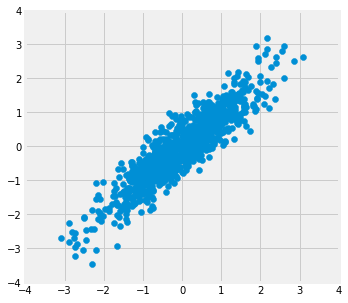

In [11]:
r_scatter(0.9)

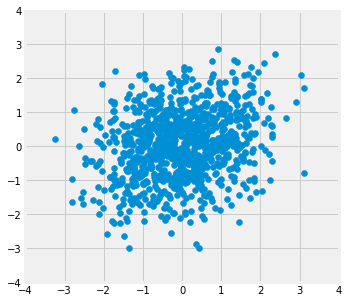

In [12]:
r_scatter(0.25)

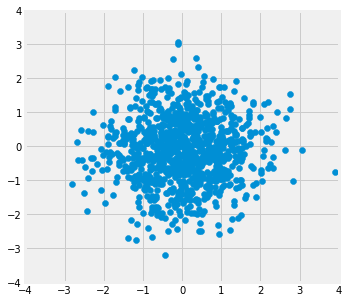

In [13]:
r_scatter(0)

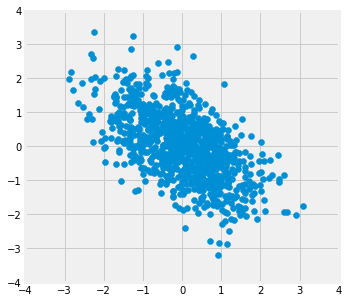

In [14]:
r_scatter(-0.55)

## $r$ is the least squares slope in standard units

Imagine we are interested in the least squares straight line relating the 'mpg' values *in standard units* to the 'mrsp' values *in standard units*.

We would follow the recipe we know from our previous regressions.

In [15]:
def ss_any_line(c_s, x_values, y_values):
    c, s = c_s
    predicted = c + x_values * s
    error = y_values - predicted
    return np.sum(error ** 2)

Find the best intercept and slope:

In [16]:
from scipy.optimize import minimize
best_c, best_s = minimize(ss_any_line, [0, -0.5],
                          args=(suv_mpg_su, suv_msrp_su)).x
print('Intercept', best_c)
print('Slope', best_s)

Intercept 0.0
Slope -0.6667143664191213


Notice that the intercept is exactly (or very close to) zero.  In fact, it turns out that
this will always be so *when we calculate the line on arrays in standard
units*.

The slope is $r$ - the correlation coefficient.

**The correlation coefficient is the least-squares slope between the two input arrays that have been converted to standard units**.

We will soon see that we can get this same value, without using `minimize`, using a simple calculation on the x and y values.

## $r$ by calculation

The formula for $r$ is not apparent from our observations so far. It has
a mathematical basis that is outside the scope of this class. However,
as you will see, the calculation is straightforward and helps us
understand several of the properties of $r$.

**Formula for $r$**:

**$r$ is the average of the products of the two variables, when both
variables are measured in standard units.**

Here are the steps in the calculation. We will apply the steps to
a simple table of values of $x$ and $y$.

In [17]:
x = np.arange(1, 7)
y = np.array([2, 3, 1, 5, 2, 7])
t = pd.DataFrame()
t['x'] = x
t['y'] = y
t

,x,y
0,1,2
1,2,3
2,3,1
3,4,5
4,5,2
5,6,7


Based on the scatter diagram, we expect that $r$ will be positive but
not equal to 1.

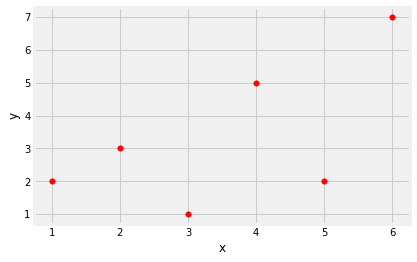

In [18]:
t.plot.scatter('x', 'y', s=30, color='red')

**Step 1.** Convert each variable to standard units.

In [19]:
t_su = pd.DataFrame()
t_su['x (standard units)'] = standard_units(x)
t_su['y (standard units)'] = standard_units(y)
t_su

,x (standard units),y (standard units)
0,-1.46385,-0.648886
1,-0.87831,-0.162221
2,-0.29277,-1.135550
3,0.29277,0.811107
4,0.87831,-0.648886
5,1.46385,1.784436


**Step 2.** Multiply each pair of standard units.

In [20]:
t_product = t_su['x (standard units)'] * t_su['y (standard units)']
t_su['product of standard units'] = t_product
t_su

,x (standard units),y (standard units),product of standard units
0,-1.46385,-0.648886,0.949871
1,-0.87831,-0.162221,0.142481
2,-0.29277,-1.135550,0.332455
3,0.29277,0.811107,0.237468
4,0.87831,-0.648886,-0.569923
5,1.46385,1.784436,2.612146


**Step 3.** $r$ is the average of the products computed in Step 2.

In [21]:
# r is the average of the products of standard units
r = np.mean(t_su['product of standard units'])
r

0.6174163971897709

As expected, $r$ is positive but not equal to 1.


## Properties of $r$

The calculation shows that:

- $r$ is a pure number. It has no units. This is because $r$ is based on
  standard units.
- $r$ is unaffected by changing the units on either axis. This too is
  because $r$ is based on standard units.
- $r$ is unaffected by switching the axes. Algebraically, this is
  because the product of standard units does not depend on which
  variable is called $x$ and which $y$. Geometrically, switching axes
  reflects the scatter plot about the line $y=x$, but does not change
  the amount of clustering nor the sign of the association.

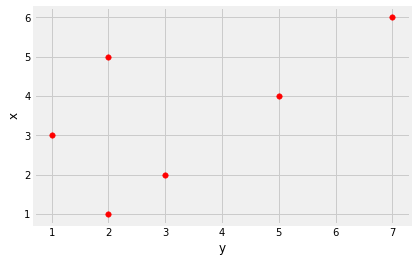

In [22]:
t.plot.scatter('y', 'x', s=30, color='red')

### The `correlation` function

We are going to be calculating correlations repeatedly, so it will help
to define a function that computes it by performing all the steps
described above. Let's define a function ``correlation`` that takes
a table and the labels of two columns in the table. The function returns
$r$, the mean of the products of those column values in standard units.

In [23]:
def correlation(t, x_name, y_name):
    """ Correlation by calculation
    """
    x = t[x_name]
    y = t[y_name]
    return np.mean(standard_units(x) * standard_units(y))

This is a `minimize` version of the function - it will return very similar results:

In [24]:
def correlation_minimize(t, x_name, y_name):
    """ Correlation by minimization
    """
    x = t[x_name]
    y = t[y_name]
    x_su, y_su = standard_units(x), standard_units(y)
    intercept, slope = minimize(ss_any_line, [0, 1], args=(x_su, y_su)).x
    if not np.isclose(intercept, 0):
        print('Oh dear, intercept not near 0')
    return slope

Let's call the function on the ``x`` and ``y`` columns of ``t``. The
function returns the same answer to the correlation between $x$ and $y$
as we got by direct application of the formula for $r$. 

In [25]:
correlation(t, 'x', 'y')

0.6174163971897709

The minimize version returns almost exactly the same result:

In [26]:
correlation_minimize(t, 'x', 'y')

0.6174163997127619

As we noticed, the order in which the variables are specified doesn't
matter.

In [27]:
correlation(t, 'y', 'x')

0.6174163971897709

Calling ``correlation`` on columns of the table ``suv`` gives us the
correlation between price and miles per gallon as well as the
correlation between price and acceleration.

In [28]:
correlation(suv, 'mpg', 'msrp')

-0.6667143635709919

In [29]:
correlation(suv, 'acceleration', 'msrp')

0.48699799279959155

These values confirm what we had observed: 

- There is a negative association between price and efficiency, whereas
  the association between price and acceleration is positive.
- The linear relation between price and acceleration is a little weaker
  (correlation about 0.5) than between price and miles per gallon
  (correlation about -0.67).

Correlation is a simple and powerful concept, but it is sometimes
misused. Before using $r$, it is important to be aware of what
correlation does and does not measure.


### Association is not Causation

Correlation only measures association. Correlation does not imply
causation. Though the correlation between the weight and the math
ability of children in a school district may be positive, that does not
mean that doing math makes children heavier or that putting on weight
improves the children's math skills. Age is a confounding variable:
older children are both heavier and better at math than younger
children, on average.


### Correlation Measures *Linear* Association

Correlation measures only one kind of association – linear. Variables
that have strong non-linear association might have very low correlation.
Here is an example of variables that have a perfect quadratic relation
$y = x^2$ but have correlation equal to 0.

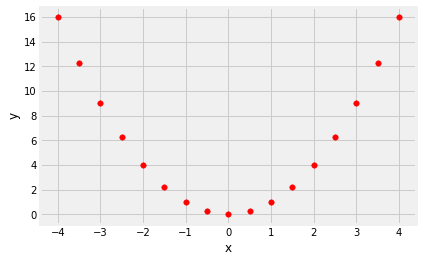

In [30]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = pd.DataFrame()
nonlinear['x'] = new_x
nonlinear['y'] = new_x ** 2
nonlinear.plot.scatter('x', 'y', s=30, color='r');

In [31]:
correlation(nonlinear, 'x', 'y')

0.0

### Correlation is Affected by Outliers

Outliers can have a big effect on correlation. Here is an example where
a scatter plot for which $r$ is equal to 1 is turned into a plot for
which $r$ is equal to 0, by the addition of just one outlying point.

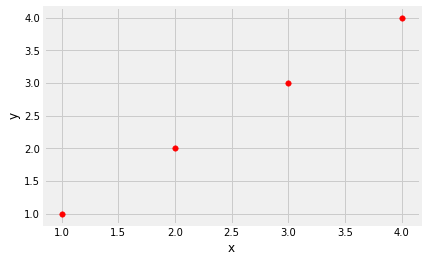

In [32]:
line = pd.DataFrame()
line['x'] = np.array([1, 2, 3, 4])
line['y'] = np.array([1, 2, 3, 4])
line.plot.scatter('x', 'y', s=30, color='r')

In [33]:
correlation(line, 'x', 'y')

1.0

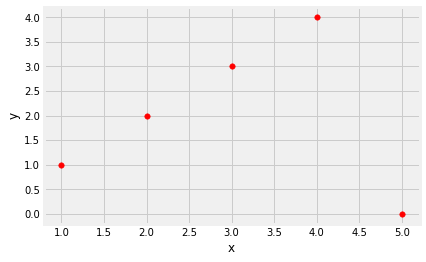

In [34]:
outlier = pd.DataFrame()
outlier['x'] = np.array([1, 2, 3, 4, 5])
outlier['y'] = np.array([1, 2, 3, 4, 0])
outlier.plot.scatter('x', 'y', s=30, color='r');

In [35]:
correlation(outlier, 'x', 'y')

0.0

### Ecological Correlations Should be Interpreted with Care

Correlations based on aggregated data can be misleading. As an example,
here are data on the Critical Reading and Math SAT scores in 2014. There
is one point for each of the 50 states and one for Washington, D.C. The
column ``Participation Rate`` contains the percent of high school
seniors who took the test. The next three columns show the average score
in the state on each portion of the test, and the final column is the
average of the total scores on the test.

You can download the file via [sat2014.csv]({{ site.baseurl
}}/data/sat2014.csv).

In [36]:
sat2014 = pd.read_csv('sat2014.csv').sort_values('State')
sat2014.head()

,State,Participation Rate,Critical Reading,Math,Writing,Combined
21,Alabama,6.7,547,538,532,1617
34,Alaska,54.2,507,503,475,1485
26,Arizona,36.4,522,525,500,1547
15,Arkansas,4.2,573,571,554,1698
33,California,60.3,498,510,496,1504


The scatter diagram of Math scores versus Critical Reading scores is
very tightly clustered around a straight line; the correlation is close
to 0.985.

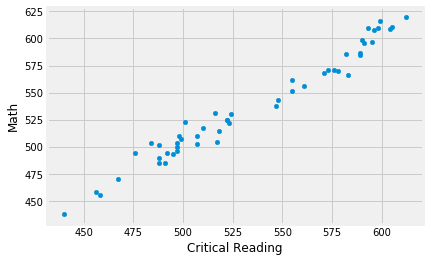

In [37]:
sat2014.plot.scatter('Critical Reading', 'Math')

In [38]:
correlation(sat2014, 'Critical Reading', 'Math')

0.9847558411067434

That's an extremely high correlation. But it's important to note that
this does not reflect the strength of the relation between the Math and
Critical Reading scores of *students*.

The data consist of average scores in each state. But states don't take
tests – students do. The data in the table have been created by lumping
all the students in each state into a single point at the average values
of the two variables in that state. But not all students in the state
will be at that point, as students vary in their performance. If you
plot a point for each student instead of just one for each state, there
will be a cloud of points around each point in the figure above. The
overall picture will be more fuzzy. The correlation between the Math and
Critical Reading scores of the students will be *lower* than the value
calculated based on state averages.

Correlations based on aggregates and averages are called *ecological
correlations* and are frequently reported. As we have just seen, they
must be interpreted with care.


### Serious or tongue-in-cheek?

In 2012,
a [paper](http://www.biostat.jhsph.edu/courses/bio621/misc/Chocolate%20consumption%20cognitive%20function%20and%20nobel%20laurates%20%28NEJM%29.pdf)
in the respected New England Journal of Medicine examined the relation
between chocolate consumption and Nobel Prizes in a group of countries.
The [Scientific
American](http://blogs.scientificamerican.com/the-curious-wavefunction/chocolate-consumption-and-nobel-prizes-a-bizarre-juxtaposition-if-there-ever-was-one/)
responded seriously whereas
[others](http://www.reuters.com/article/2012/10/10/us-eat-chocolate-win-the-nobel-prize-idUSBRE8991MS20121010#vFdfFkbPVlilSjsB.97)
were more relaxed. You are welcome to make your own decision! The
following graph, provided in the paper, should motivate you to go and
take a look.

![]({{ site.baseurl }}/images/chocoNobel.png)

{% data8page Correlation %}